In [1]:
# Downloading Dataset from Kaggle
# Link - https://www.kaggle.com/competitions/playground-series-s4e9/data
# !kaggle competitions download -c playground-series-s4e9


  0%|          | 0.00/7.84M [00:00<?, ?B/s]
 13%|█▎        | 1.00M/7.84M [00:00<00:00, 10.0MB/s]
 26%|██▌       | 2.00M/7.84M [00:00<00:00, 9.36MB/s]
 38%|███▊      | 3.00M/7.84M [00:00<00:00, 9.51MB/s]
 64%|██████▍   | 5.00M/7.84M [00:00<00:00, 10.3MB/s]
 89%|████████▉ | 7.00M/7.84M [00:00<00:00, 10.6MB/s]
100%|██████████| 7.84M/7.84M [00:00<00:00, 10.4MB/s]


In [2]:
# # Unzipping files to data folder
# import zipfile

# with zipfile.ZipFile("playground-series-s4e9.zip", "r") as zip_ref:
#  zip_ref.extractall("data")

In [1]:
# Imporing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('data/train.csv')

test = pd.read_csv('data/test.csv')

print(f'Train Shape: {train.shape}')
print(f'Test Shape: {test.shape}')

Train Shape: (188533, 13)
Test Shape: (125690, 12)


In [4]:
train.head(5)


,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [5]:
train.isnull().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

In [6]:
train.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


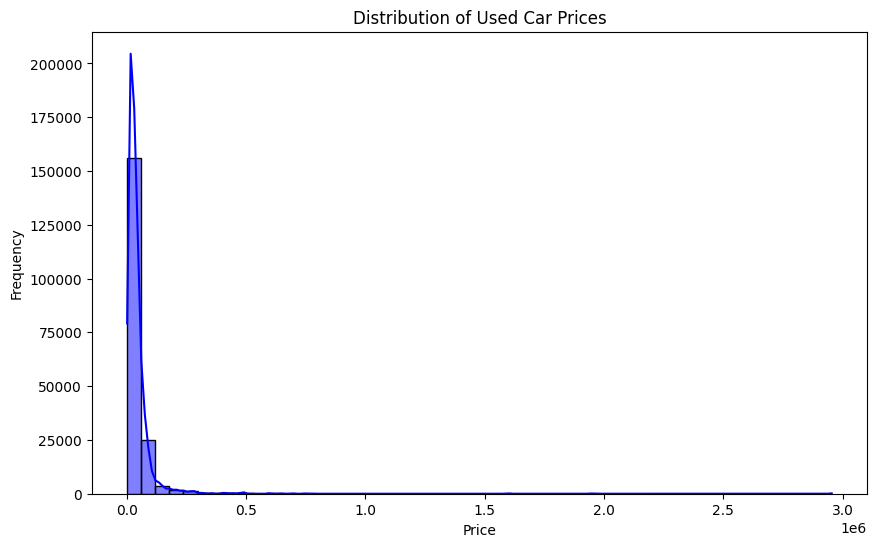

In [9]:
plt.figure(figsize=(10,6))
sns.histplot(train['price'], bins=50, kde=True, color='blue')
plt.title('Distribution of Used Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [10]:
train['fuel_type'].value_counts()

fuel_type
Gasoline          165940
Hybrid              6832
E85 Flex Fuel       5406
Diesel              3955
–                    781
Plug-In Hybrid       521
not supported         15
Name: count, dtype: int64

In [13]:
# Since fuel_type is primarily gasoline 
# and other categories like Hybrid, E85 Flex Fuel, ..., not supported,
# Combine Low Frequency Categories: Gasoline/Not Gasoline

train['fuel_type'] = train['fuel_type'].apply(lambda x: 'Gasoline' 
                                             if x == 'Gasoline'
                                             else 'Not Gasoline')

In [14]:
train['fuel_type'].value_counts()

fuel_type
Gasoline        165940
Not Gasoline     22593
Name: count, dtype: int64

In [26]:
train['accident'].isnull().sum()

np.int64(2452)

In [27]:
# Condition of if  accident is Null, but clean_title is Yes
condition_yes = train[(train['accident'].isnull()) & (train['clean_title'] == 'Yes')]

train.loc[condition_yes, 'accident'] = 'No'

# Condition of if accident is Null, but clean_title is No

condition_no = train[(train['accident'].isnull()) & (train['clean_title'] == 'No')]

train.loc[condition_yes, 'accident'] = 'Yes'

KeyError: "None of [Index([                                                  ('i', 'd'),\n                                          ('b', 'r', 'a', 'n', 'd'),\n                                          ('m', 'o', 'd', 'e', 'l'),\n                 ('m', 'o', 'd', 'e', 'l', '_', 'y', 'e', 'a', 'r'),\n                                     ('m', 'i', 'l', 'a', 'g', 'e'),\n                      ('f', 'u', 'e', 'l', '_', 't', 'y', 'p', 'e'),\n                                     ('e', 'n', 'g', 'i', 'n', 'e'),\n       ('t', 'r', 'a', 'n', 's', 'm', 'i', 's', 's', 'i', 'o', 'n'),\n                                ('e', 'x', 't', '_', 'c', 'o', 'l'),\n                                ('i', 'n', 't', '_', 'c', 'o', 'l'),\n                           ('a', 'c', 'c', 'i', 'd', 'e', 'n', 't'),\n            ('c', 'l', 'e', 'a', 'n', '_', 't', 'i', 't', 'l', 'e'),\n                                          ('p', 'r', 'i', 'c', 'e')],\n      dtype='object')] are in the [index]"

In [ ]:
train.loc[condition, 'accident'] = 'No'